In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('results/experiment_results_20250123_063921.csv')
df.head()

,run_id,accuracy,time,pruning_method,dataset_size,selection_strategy,apply_pca,k,n_closest,n_furthest,num_epochs,batch_size,learning_rate,experiment_id
0,1,90.51,3.582634,random,600,NaN,False,1,1,1,5,64,0.001,1
1,1,84.29,4.265197,cluster,600,closest,False,50,1,1,5,64,0.001,2
2,1,66.87,4.226172,cluster,600,furthest,False,50,1,1,5,64,0.001,3
3,1,90.31,4.701893,cluster,600,random,False,50,1,1,5,64,0.001,4
4,1,90.34,8.740841,cluster,3000,closest,False,50,1,1,5,64,0.001,5


In [12]:
# Aggregate results
group_cols = [
    "pruning_method",
    "dataset_size",
    "selection_strategy",
    "apply_pca",
    "k",
    "n_closest",
    "n_furthest",
]
agg_results = (
    df.groupby(group_cols)
    .agg(
        median_accuracy=("accuracy", "median"),
        median_time=("time", "median"),
        count_runs=("run_id", "count"),
    )
    .reset_index()
)
agg_results.head(20)

,pruning_method,dataset_size,selection_strategy,apply_pca,k,n_closest,n_furthest,median_accuracy,median_time,count_runs
0,cluster,600,closest,False,50,1,1,84.29,4.265197,1
1,cluster,600,closest,True,50,1,1,87.38,3.998766,1
2,cluster,600,furthest,False,50,1,1,66.87,4.226172,1
3,cluster,600,furthest,True,50,1,1,57.43,3.999376,1
4,cluster,600,random,False,50,1,1,90.31,4.701893,1
5,cluster,600,random,True,50,1,1,89.52,3.994988,1
6,cluster,3000,closest,False,50,1,1,90.34,8.740841,1
7,cluster,3000,closest,True,50,1,1,91.25,7.790495,1
8,cluster,3000,furthest,False,50,1,1,96.17,8.110347,1
9,cluster,3000,furthest,True,50,1,1,96.14,7.279943,1


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
def plot_experiment_results(df):
    df['strategy_composite'] = df.apply(
        lambda x: f"{x['pruning_method']}-{x['selection_strategy']}" if pd.notna(x['selection_strategy']) 
        else x['pruning_method'], axis=1
    )
    # Set the style
    sns.set_style("whitegrid")
    sns.set_palette("husl")
    
    # Create figure with adequate size
    plt.figure(figsize=(12, 6))
    
    # Create the grouped bar plot
    ax = sns.barplot(
        data=df,
        x='dataset_size',
        y='accuracy',
        hue='strategy_composite',
        errorbar=None,
        order=[600, 3000]  # Force order
    )
    
    # Customize the plot
    plt.title('MNIST Classification Accuracy vs Dataset Size', pad=20, size=14)
    plt.xlabel('Dataset Size (samples)', size=12)
    plt.ylabel('Accuracy (%)', size=12)
    
    # Replace x-tick labels with percentages
    ax.set_xticklabels(['1% (600)', '5% (3000)'])
    
    # Add value labels on the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=3)
    
    # Customize legend
    plt.legend(
        title='Selection Strategy',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Set y-axis to start from a reasonable minimum
    plt.ylim(60, 100)
    
    return plt.gcf()

/var/folders/df/nf3r4lm93rbf2zr46sdq3mkc0000gp/T/ipykernel_18855/3223324788.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1% (600)', '5% (3000)'])


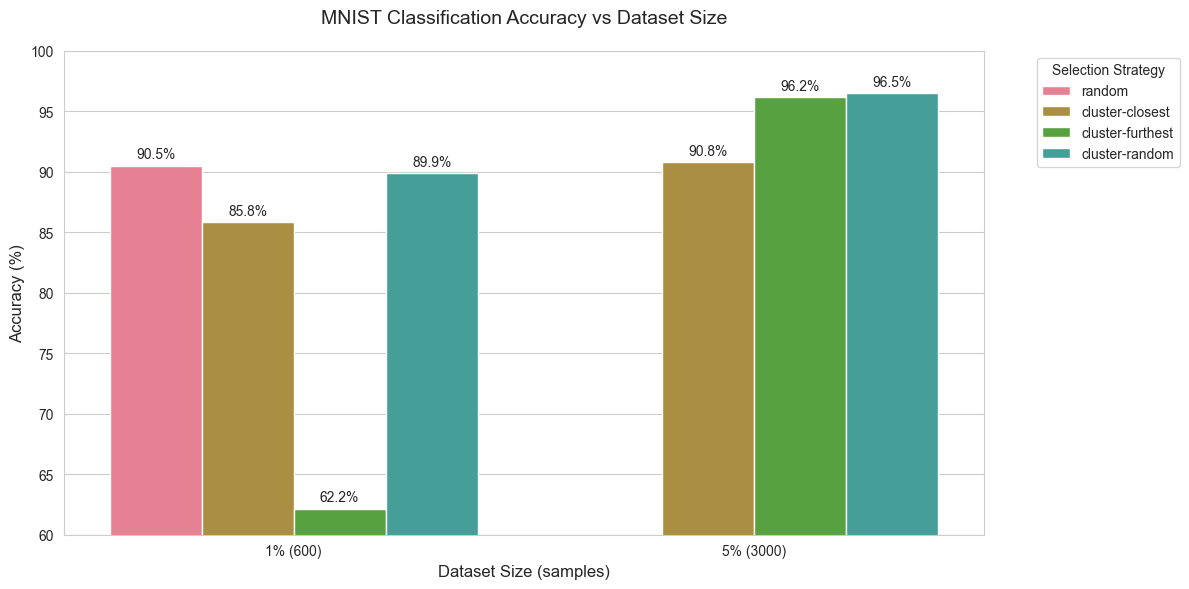

In [14]:
figure = plot_experiment_results(df)
plt.show()  # Display the plot
# figure.savefig('experiment_results.png', dpi=300, bbox_inches='tight')  # Save the plot

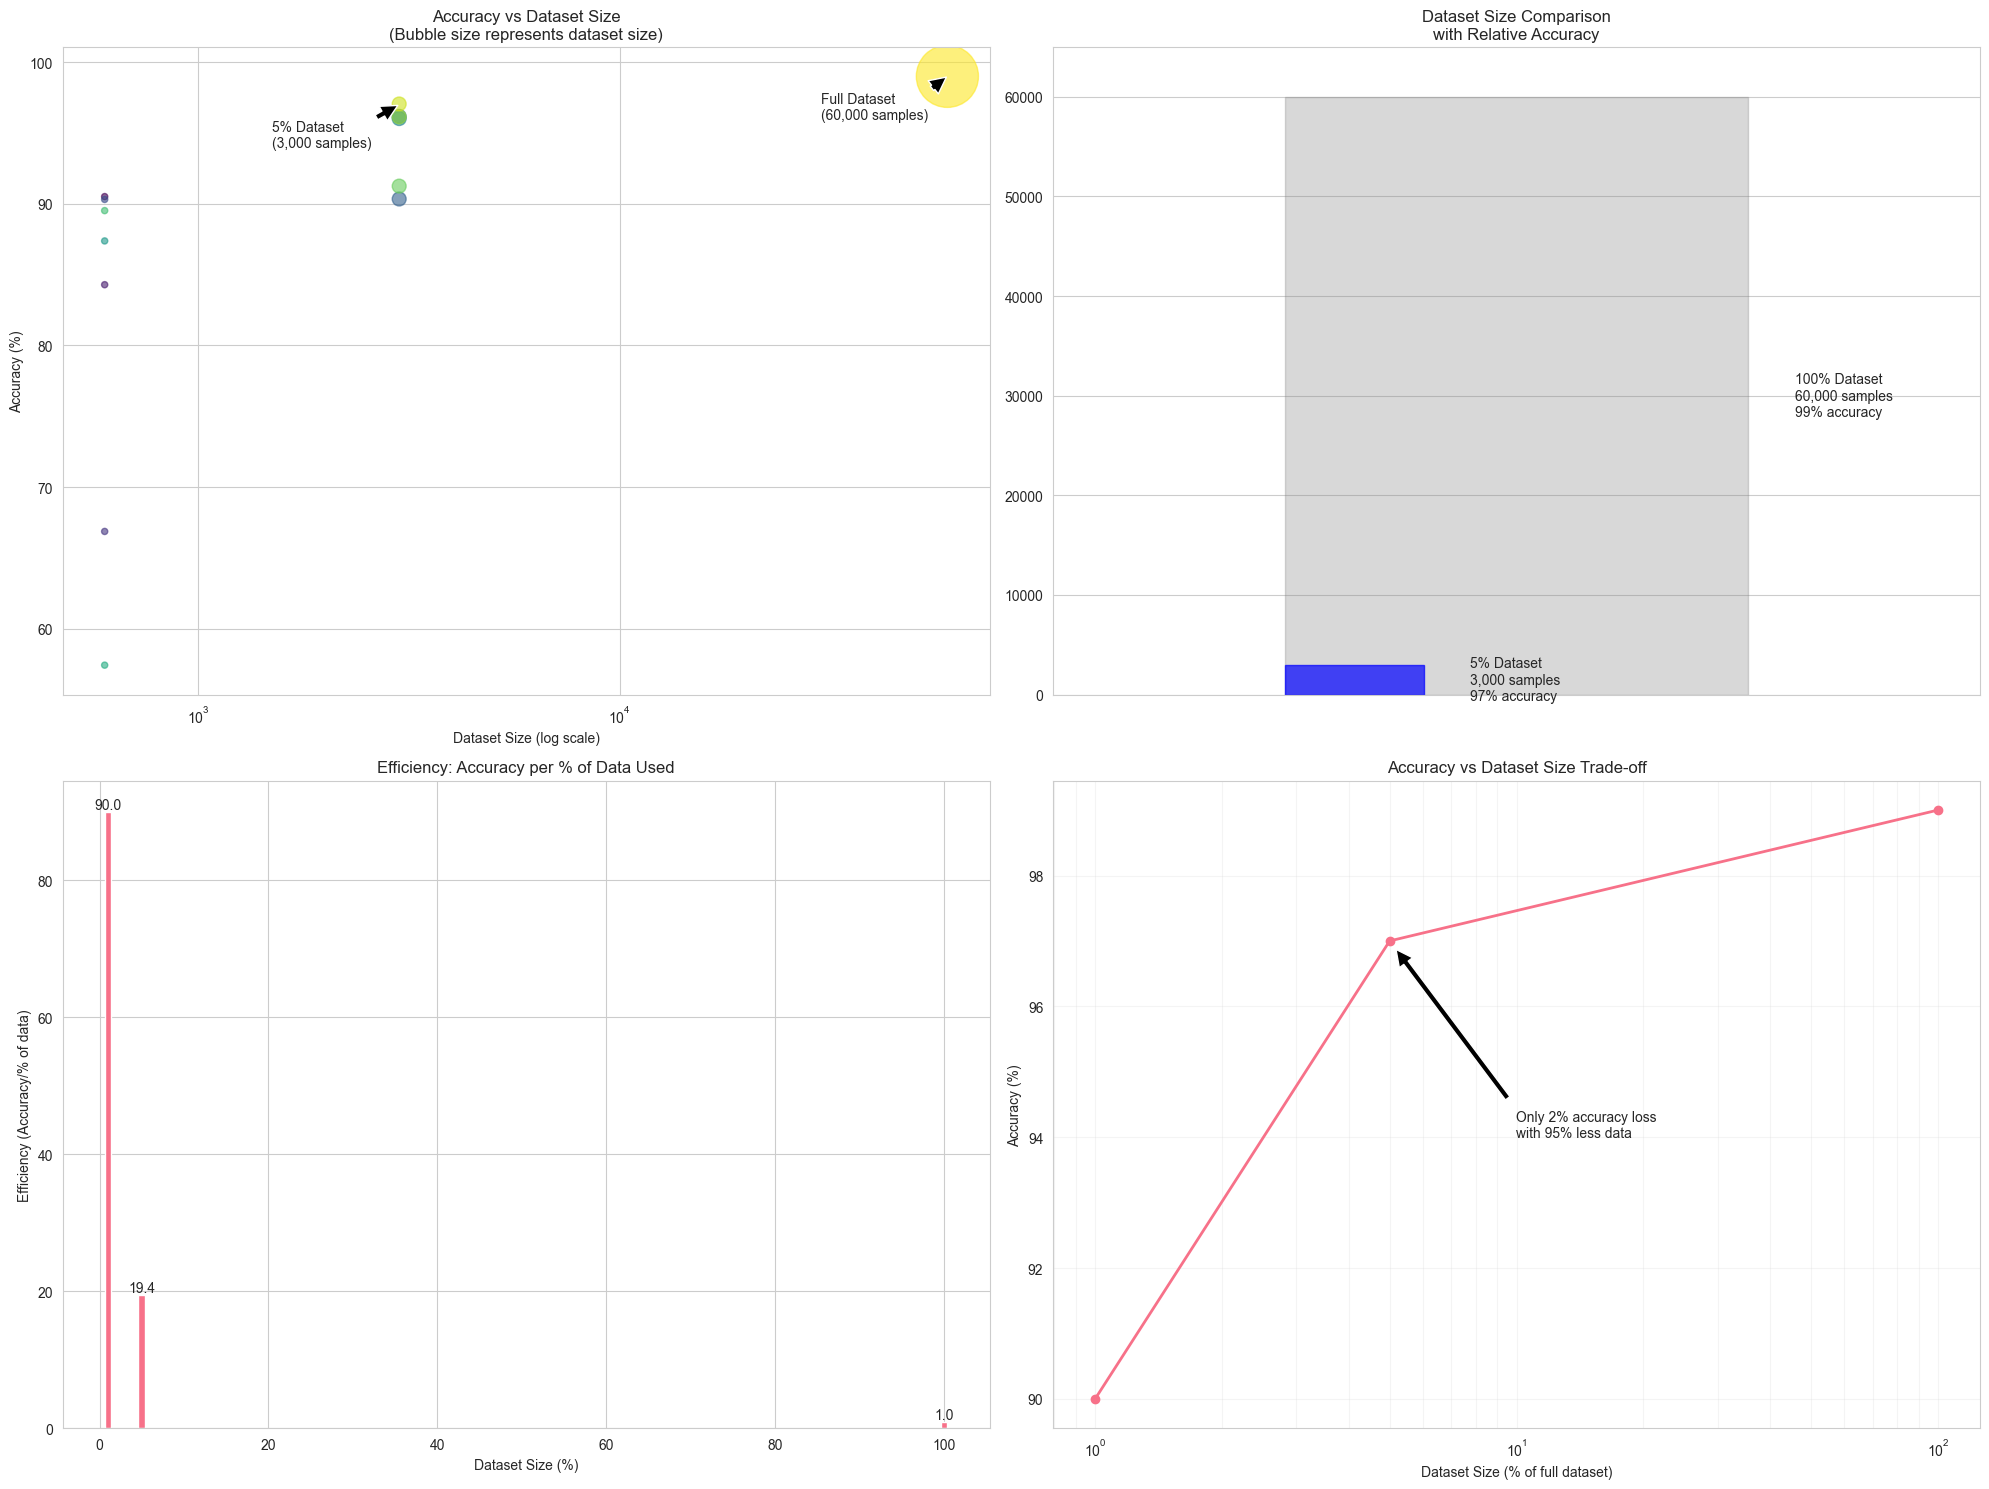

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def create_comparison_visualizations(df):
    # Add full dataset reference point
    full_data = pd.DataFrame({
        'dataset_size': [60000],  # Assuming this is 100%
        'accuracy': [99.0],
        'strategy_composite': ['full-dataset']
    })
    
    # Combine with existing data
    df_with_full = pd.concat([
        df,
        full_data
    ])
    
    # Create multiple visualizations
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Logarithmic Bubble Plot
    ax1 = plt.subplot(221)
    sizes = df_with_full['dataset_size'].values
    accuracies = df_with_full['accuracy'].values
    
    # Create bubble plot
    scatter = plt.scatter(
        sizes, 
        accuracies,
        s=sizes/30,  # Scale bubble size
        alpha=0.6,
        c=np.arange(len(sizes)),
        cmap='viridis'
    )
    
    plt.xscale('log')
    plt.xlabel('Dataset Size (log scale)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy vs Dataset Size\n(Bubble size represents dataset size)')
    
    # Add annotations for key points
    plt.annotate('Full Dataset\n(60,000 samples)',
                xy=(60000, 99),
                xytext=(30000, 96),
                arrowprops=dict(facecolor='black', shrink=0.05))
                
    plt.annotate('5% Dataset\n(3,000 samples)',
                xy=(3000, 97),
                xytext=(1500, 94),
                arrowprops=dict(facecolor='black', shrink=0.05))
    
    # 2. Area Comparison Plot
    ax2 = plt.subplot(222)
    
    # Create rectangles for dataset size comparison
    full_rect = Rectangle((0, 0), 1, 60000, alpha=0.3, color='gray')
    five_percent_rect = Rectangle((0, 0), 0.3, 3000, alpha=0.7, color='blue')
    
    ax2.add_patch(full_rect)
    ax2.add_patch(five_percent_rect)
    
    plt.xlim(-0.5, 1.5)
    plt.ylim(0, 65000)
    plt.title('Dataset Size Comparison\nwith Relative Accuracy')
    
    # Add text annotations
    plt.text(1.1, 60000/2, f'100% Dataset\n60,000 samples\n99% accuracy', 
             verticalalignment='center')
    plt.text(0.4, 3000/2, f'5% Dataset\n3,000 samples\n97% accuracy',
             verticalalignment='center')
    
    # Remove axes for cleaner look
    ax2.set_xticks([])
    
    # 3. Efficiency Plot
    ax3 = plt.subplot(223)
    
    efficiency_data = pd.DataFrame({
        'Size (%)': [1, 5, 100],
        'Samples': [600, 3000, 60000],
        'Accuracy (%)': [90, 97, 99],
        'Efficiency': [90/1, 97/5, 99/100]  # Accuracy per % of data used
    })
    
    bars = plt.bar(efficiency_data['Size (%)'], efficiency_data['Efficiency'])
    plt.title('Efficiency: Accuracy per % of Data Used')
    plt.xlabel('Dataset Size (%)')
    plt.ylabel('Efficiency (Accuracy/% of data)')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom')
    
    # 4. Trade-off Plot
    ax4 = plt.subplot(224)
    
    # Create trade-off curve
    plt.plot([1, 5, 100], [90, 97, 99], 'o-', linewidth=2)
    plt.xscale('log')
    
    # Add arrows and annotations
    plt.annotate('Only 2% accuracy loss\nwith 95% less data',
                xy=(5, 97),
                xytext=(10, 94),
                arrowprops=dict(facecolor='black', shrink=0.05))
    
    plt.xlabel('Dataset Size (% of full dataset)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy vs Dataset Size Trade-off')
    plt.grid(True, which="both", ls="-", alpha=0.2)
    
    plt.tight_layout()
    return fig

# Usage:
figure = create_comparison_visualizations(df)
plt.show()
# figure.savefig('size_accuracy_comparison.png', dpi=300, bbox_inches='tight')

/var/folders/df/nf3r4lm93rbf2zr46sdq3mkc0000gp/T/ipykernel_18855/3885287531.py:98: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



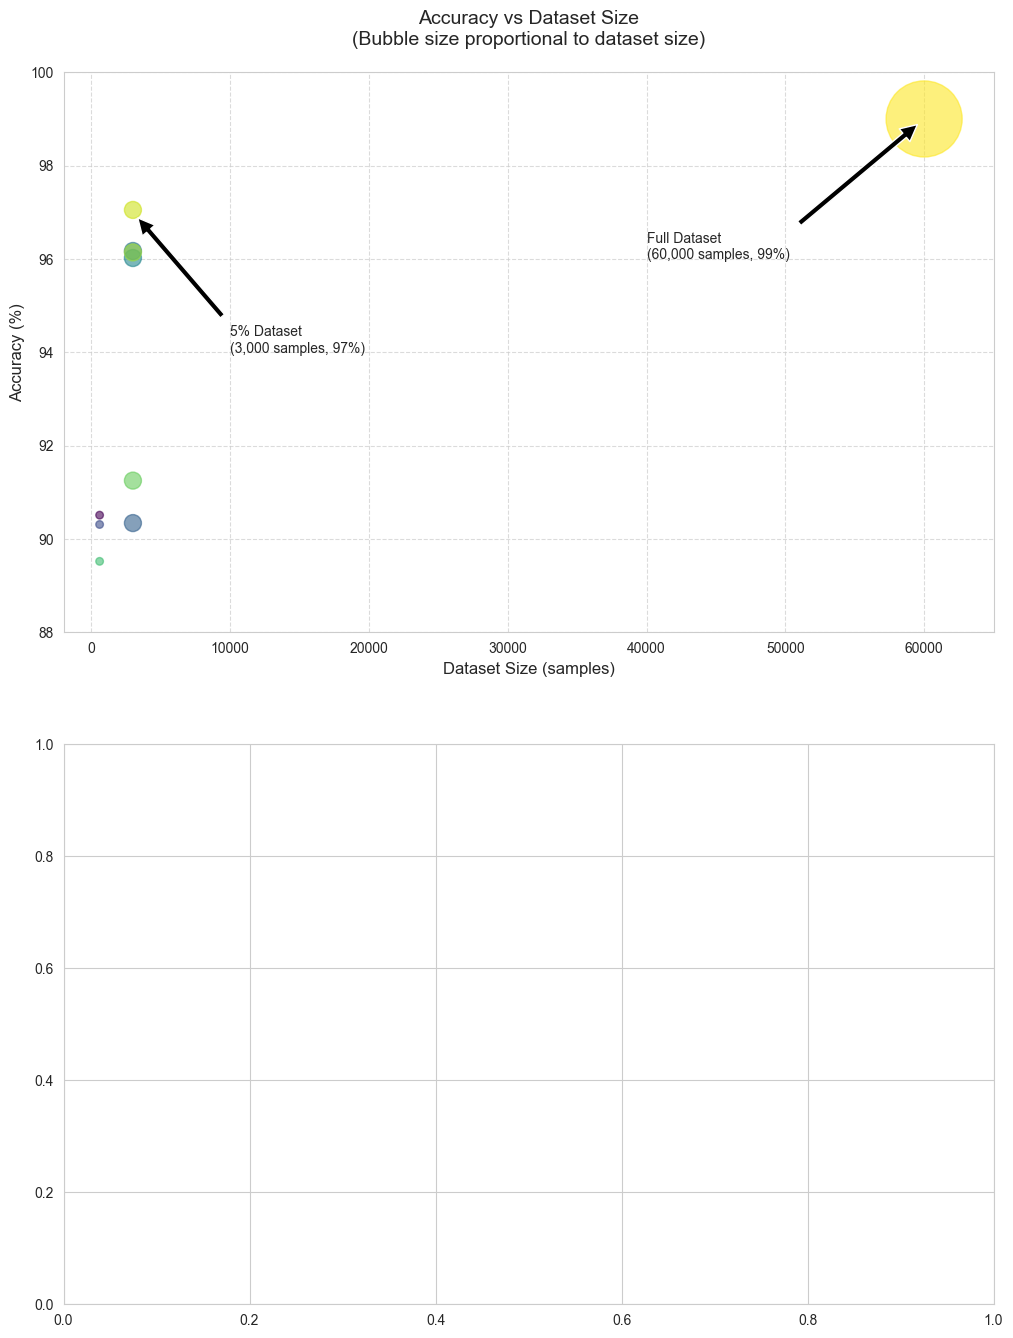

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_visualizations(df):
    # Add full dataset reference point
    full_data = pd.DataFrame({
        'dataset_size': [60000],  # Full MNIST dataset size
        'accuracy': [99.0],
        'strategy_composite': ['full-dataset']
    })
    
    df_with_full = pd.concat([df, full_data])
    
    # Create both visualizations
    fig, ax = plt.subplots(2, 1, figsize=(12, 16))
    
    # 1. Linear Scale Bubble Plot
    sizes = df_with_full['dataset_size'].values
    accuracies = df_with_full['accuracy'].values
    
    # Normalize sizes for bubbles to be more visually appealing
    normalized_sizes = (sizes / np.max(sizes)) * 3000  # Adjust multiplier as needed
    
    scatter = ax[0].scatter(
        sizes, 
        accuracies,
        s=normalized_sizes,
        alpha=0.6,
        c=np.arange(len(sizes)),
        cmap='viridis'
    )
    
    # Add grid for better readability
    ax[0].grid(True, linestyle='--', alpha=0.7)
    
    # Customize axes
    ax[0].set_xlabel('Dataset Size (samples)', fontsize=12)
    ax[0].set_ylabel('Accuracy (%)', fontsize=12)
    ax[0].set_title('Accuracy vs Dataset Size\n(Bubble size proportional to dataset size)', 
                    fontsize=14, pad=20)
    
    # Add annotations for key points
    ax[0].annotate('Full Dataset\n(60,000 samples, 99%)',
                  xy=(60000, 99),
                  xytext=(40000, 96),
                  arrowprops=dict(facecolor='black', shrink=0.05))
                  
    ax[0].annotate('5% Dataset\n(3,000 samples, 97%)',
                  xy=(3000, 97),
                  xytext=(10000, 94),
                  arrowprops=dict(facecolor='black', shrink=0.05))
    
    # Adjust axes limits
    ax[0].set_xlim(-2000, 65000)
    ax[0].set_ylim(88, 100)
    
    # 2. Sankey Diagram using Plotly
    # Create Sankey data
    label_data = ["60k samples (100%)", "3k samples (5%)", "600 samples (1%)",
                  "99% accuracy", "97% accuracy", "90% accuracy"]
    
    # Define source, target, and value for each flow
    source = [0, 1, 2]  # Indices of source nodes
    target = [3, 4, 5]  # Indices of target nodes
    value = [60000, 3000, 600]  # Size of flows
    
    # Create Sankey diagram
    sankey = go.Figure(data=[go.Sankey(
        node = dict(
            pad = 15,
            thickness = 20,
            line = dict(color = "black", width = 0.5),
            label = label_data,
            color = "blue"
        ),
        link = dict(
            source = source,
            target = target,
            value = value
        )
    )])
    
    # Update layout
    sankey.update_layout(
        title_text="Data Size to Accuracy Flow",
        font_size=12,
        height=600
    )
    
    return fig, sankey

# Usage:
matplotlib_fig, plotly_fig = create_visualizations(df)
matplotlib_fig.show()  # Show bubble plot
plotly_fig.show()  # Show Sankey diagram
# matplotlib_fig.savefig('bubble_plot.png', dpi=300, bbox_inches='tight')
# plotly_fig.write_html('sankey_diagram.html')

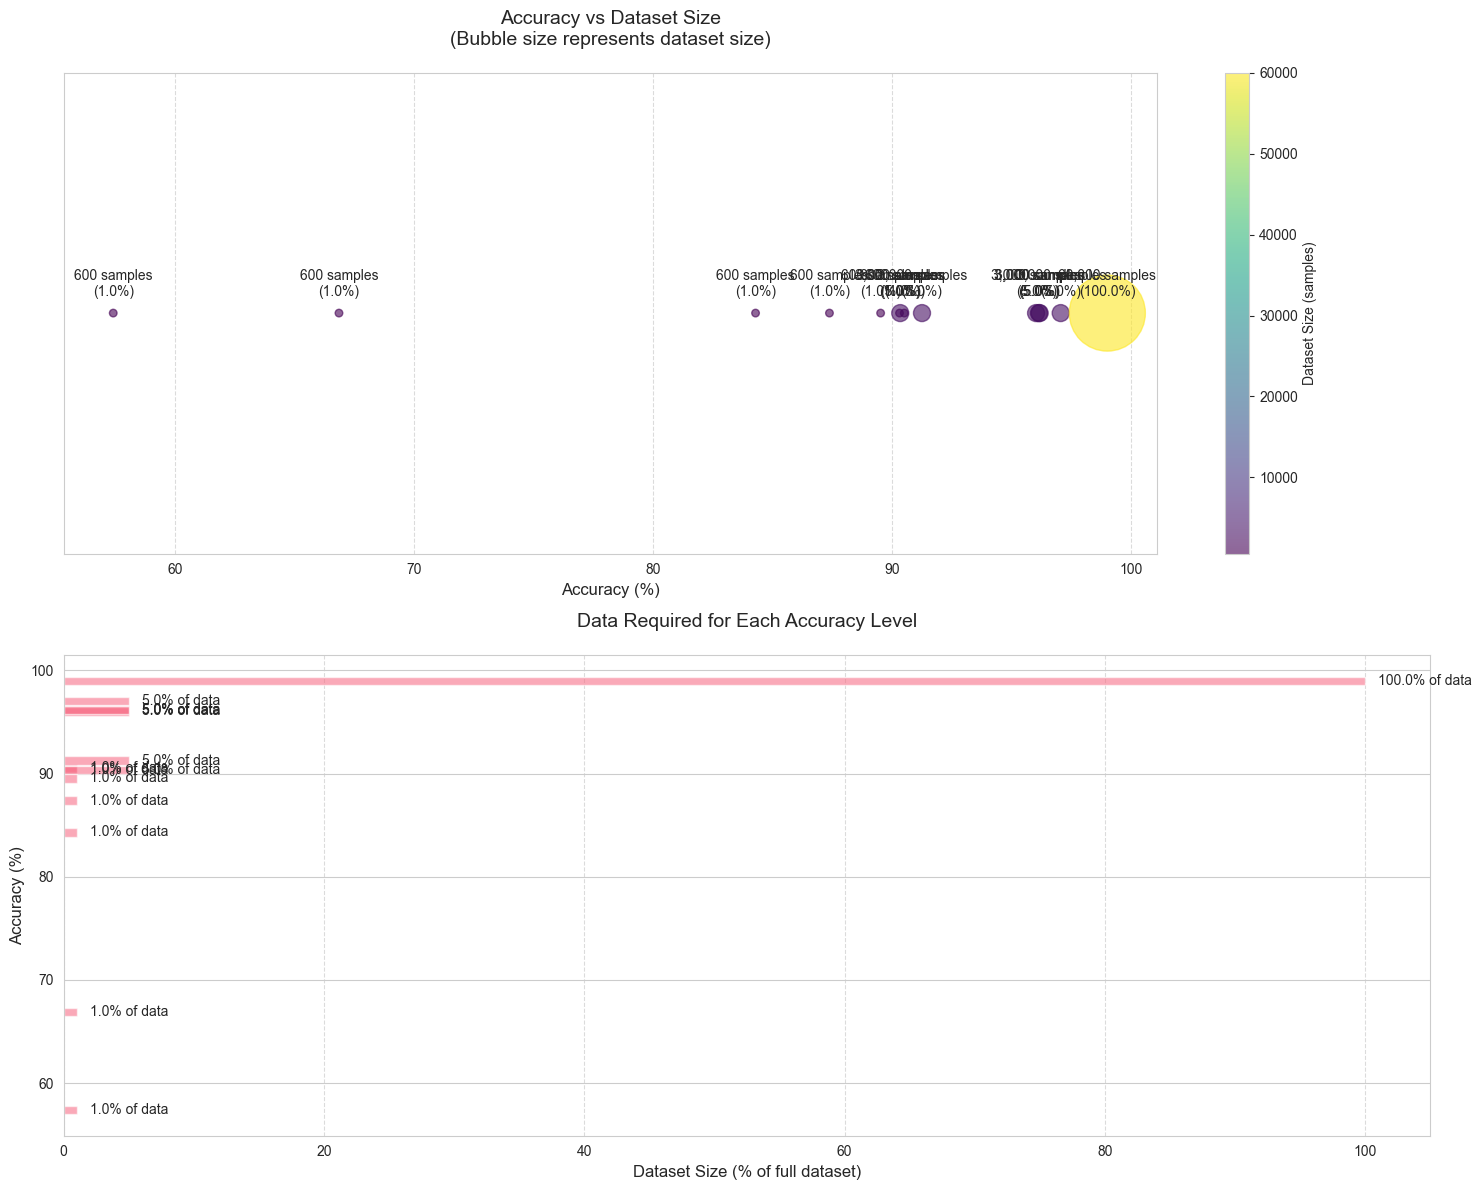

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def create_accuracy_focused_plots(df):
    # Add full dataset reference point
    full_data = pd.DataFrame({
        'dataset_size': [60000],
        'accuracy': [99.0],
        'strategy_composite': ['full-dataset'],
        'dataset_percentage': [100]
    })
    
    # Add percentage column to original data
    df['dataset_percentage'] = (df['dataset_size'] / 60000) * 100
    
    df_with_full = pd.concat([df, full_data])
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # 1. Bubble Plot with Accuracy on X-axis
    # Normalize sizes for bubbles
    sizes = (df_with_full['dataset_size'] / 60000) * 3000  # Scale bubbles appropriately
    
    scatter = ax1.scatter(
        df_with_full['accuracy'],
        np.zeros_like(df_with_full['accuracy']),  # All points on same y-level
        s=sizes,
        alpha=0.6,
        c=df_with_full['dataset_size'],
        cmap='viridis'
    )
    
    # Add size labels inside or near bubbles
    for i, row in df_with_full.iterrows():
        ax1.annotate(f'{row["dataset_size"]:,} samples\n({row["dataset_percentage"]:.1f}%)',
                    (row['accuracy'], 0),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center',
                    va='bottom')
    
    # Customize bubble plot
    ax1.set_title('Accuracy vs Dataset Size\n(Bubble size represents dataset size)', pad=20, fontsize=14)
    ax1.set_xlabel('Accuracy (%)', fontsize=12)
    ax1.set_ylim(-1, 1)  # Center bubbles
    ax1.get_yaxis().set_visible(False)  # Hide y-axis
    ax1.grid(True, axis='x', linestyle='--', alpha=0.7)
    
    # Add colorbar
    plt.colorbar(scatter, ax=ax1, label='Dataset Size (samples)')
    
    # 2. Inverted Bar Chart
    bars = ax2.barh(
        df_with_full['accuracy'],
        df_with_full['dataset_percentage'],
        alpha=0.6
    )
    
    # Add value labels on bars
    for bar in bars:
        width = bar.get_width()
        ax2.text(width + 1, 
                bar.get_y() + bar.get_height()/2,
                f'{width:.1f}% of data',
                va='center')
    
    # Customize bar chart
    ax2.set_title('Data Required for Each Accuracy Level', pad=20, fontsize=14)
    ax2.set_xlabel('Dataset Size (% of full dataset)', fontsize=12)
    ax2.set_ylabel('Accuracy (%)', fontsize=12)
    ax2.grid(True, axis='x', linestyle='--', alpha=0.7)
    
    # Adjust layout
    plt.tight_layout()
    return fig

# Usage:
figure = create_accuracy_focused_plots(df)
plt.show()
# figure.savefig('accuracy_size_comparison.png', dpi=300, bbox_inches='tight')